In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop("CustomerID", axis = 1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df = df.rename(columns= {"Annual Income (k$)": "income", "Spending Score (1-100)": "score"})

In [8]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.shape

(200, 4)

In [10]:
df.isnull().values.any()

False

# Level Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df.Gender = le.fit_transform(df['Gender'])

In [14]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


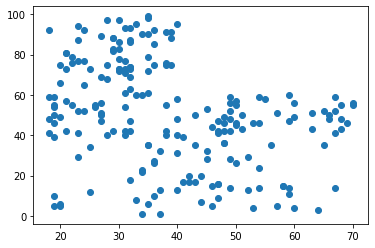

In [15]:
plt.scatter(df["Age"], df["score"])

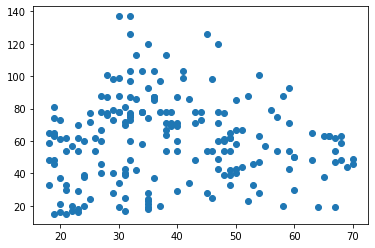

In [16]:
plt.scatter(df['Age'], df['income'])

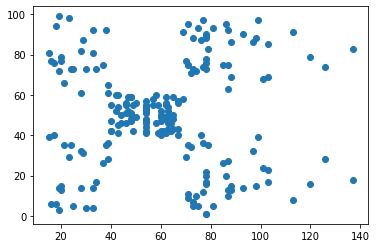

In [17]:
plt.scatter(df['income'], df['score'])

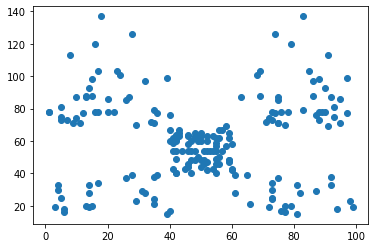

In [18]:
plt.scatter(df['score'],df['income'])

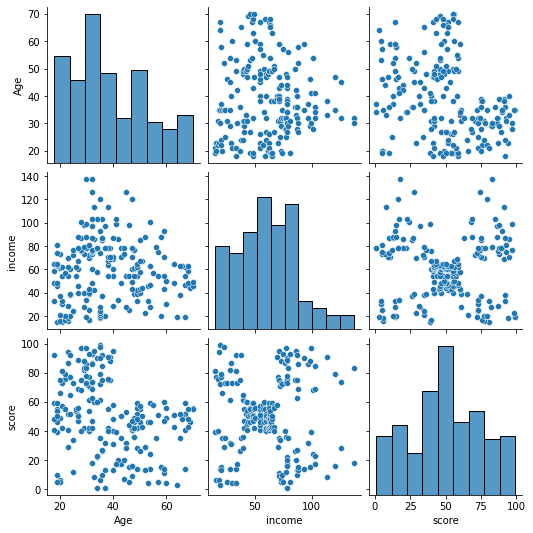

In [19]:
#pairplot
sns.pairplot(df[['Age', 'income', 'score']])

# K Means Cluster

In [20]:
import sklearn.cluster as cluster

In [21]:
kmeans = cluster.KMeans()

In [22]:
predicted = kmeans.fit_predict(df[['Gender','Age', 'income', 'score']])

In [23]:
predicted

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 5, 2,
       5, 4, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 6, 3, 6, 3, 6, 3,
       2, 3, 6, 3, 6, 3, 6, 3, 6, 3, 2, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7])

In [24]:
df['predicted_Cluster'] = predicted

In [25]:
df.head()

,Gender,Age,income,score,predicted_Cluster
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5


# Visualization

In [26]:
df1 = df[df.predicted_Cluster == 0]
df2 = df[df.predicted_Cluster == 1]
df3 = df[df.predicted_Cluster == 2]
df4 = df[df.predicted_Cluster == 3]
df5 = df[df.predicted_Cluster == 4]
df6 = df[df.predicted_Cluster == 5]
df7 = df[df.predicted_Cluster == 6]
df8 = df[df.predicted_Cluster == 7]

In [27]:
df1.head()

,Gender,Age,income,score,predicted_Cluster
180,0,37,97,32,0
182,1,46,98,15,0
184,0,41,99,39,0
186,0,54,101,24,0
188,0,41,103,17,0


In [28]:
df2.head()

,Gender,Age,income,score,predicted_Cluster
40,0,65,38,35,1
46,0,50,40,55,1
50,0,49,42,52,1
53,1,59,43,60,1
54,0,50,43,45,1


In [29]:
df6.head()

,Gender,Age,income,score,predicted_Cluster
0,1,19,15,39,5
2,0,20,16,6,5
4,0,31,17,40,5
6,0,35,18,6,5
8,1,64,19,3,5


In [30]:
df7.head()

,Gender,Age,income,score,predicted_Cluster
126,1,43,71,35,6
128,1,59,71,11,6
130,1,47,71,9,6
134,1,20,73,5,6
136,0,44,73,7,6


In [31]:
kmeans.cluster_centers_ # final centroids

array([[  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.34210526,  27.        ,  56.65789474,  49.13157895],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.40909091,  44.31818182,  25.77272727,  20.27272727],
       [  0.68      ,  41.96      ,  79.64      ,  15.4       ],
       [  0.4       ,  32.2       , 109.7       ,  82.        ]])

In [32]:
kmeans.predict([[0, 19, 64, 23]])

array([2])

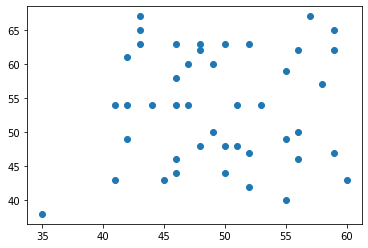

In [33]:
plt.scatter(df2['score'], df2['income'])

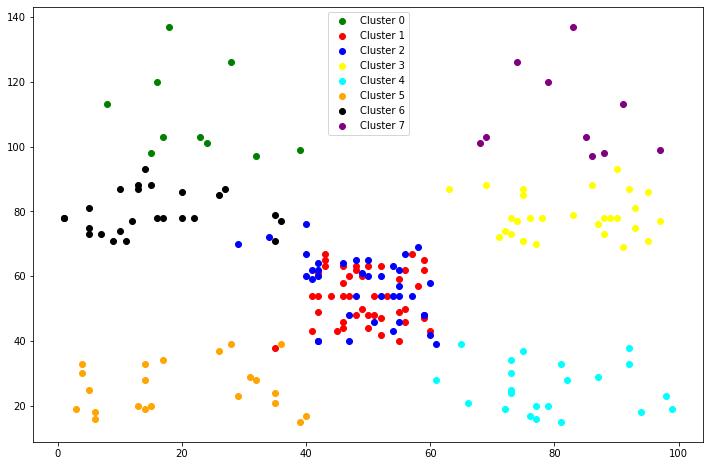

In [34]:
plt.figure(figsize=(12,8))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='cyan', label='Cluster 4')
plt.scatter(df6['score'], df6['income'], color='orange', label='Cluster 5')
plt.scatter(df7['score'], df7['income'], color='black', label='Cluster 6')
plt.scatter(df8['score'], df8['income'], color='purple', label='Cluster 7')

plt.legend()

# Tuning / Optimization Cluster

In [35]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,15)

for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['Gender','Age', 'income', 'score']])
    wcss.append(kmeans2.inertia_)

C:\Users\mahed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51165.18423710792,
 44389.80767355767,
 41019.770186335416,
 37200.17342794081,
 34374.594660298986,
 32272.675351703696,
 30084.289880952387,
 28404.42573454725]

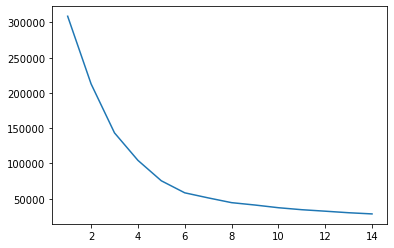

In [37]:
plt.plot(clusters , wcss) # elbow method

# Tuning K=5

In [38]:
kmeans = cluster.KMeans(n_clusters=5)

In [39]:
new_predicted = kmeans.fit_predict(df[['Gender','Age', 'income', 'score']])

In [40]:
df['new_clusters'] = new_predicted

In [41]:
new_predicted

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [42]:
df.head()

,Gender,Age,income,score,predicted_Cluster,new_clusters
0,1,19,15,39,5,1
1,1,21,15,81,4,2
2,0,20,16,6,5,1
3,0,23,16,77,4,2
4,0,31,17,40,5,1


In [43]:
print(kmeans.cluster_centers_)

[[ 0.4025974  43.72727273 55.48051948 49.32467532]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.44       24.96       28.04       77.        ]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]]


# Install Kneed

In [44]:
!pip install kneed

In [45]:
from kneed import KneeLocator
kn = KneeLocator(clusters , wcss, curve='convex', direction = 'decreasing' )

In [46]:
kn

In [47]:
optimal_num_cluster = kn.knee
print('optimal_num_cluster = ', optimal_num_cluster)

optimal_num_cluster =  5


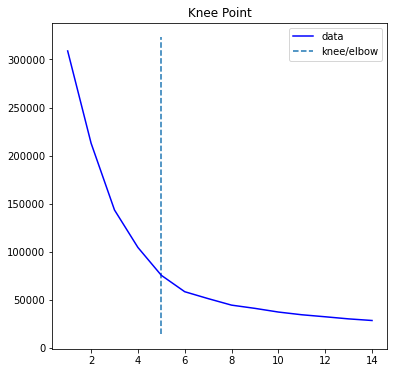

In [48]:
kn.plot_knee()